In [1]:
# importando as bibliotecas
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# criando a base de dados
# Criando o conjunto de dados
cliente_id = np.array([0,1,2,3,4,5,6,7,8,9,10]) # cria um array 
# utilizando a biblioteca numpy
valor_compra = np.array([40,150,500,5000,1834,2350,
                         5000,6740,895,3300,4750])

In [3]:
# Juntando as colunas dos dados

dados_compras = np.column_stack((cliente_id,valor_compra))

In [5]:
dados_compras

array([[   0,   40],
       [   1,  150],
       [   2,  500],
       [   3, 5000],
       [   4, 1834],
       [   5, 2350],
       [   6, 5000],
       [   7, 6740],
       [   8,  895],
       [   9, 3300],
       [  10, 4750]])

In [16]:
# aplicando o algoritmo Kmeans
kmeans = KMeans(n_clusters=3) # armazena na variavel o modelo kmeans
kmeans.fit(dados_compras) # cria o modelo kmeans

c:\Users\sn1076220\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [17]:
# Avaliando a métrica do Kmeans
sse = kmeans.inertia_
print("SSE: ",sse)

SSE:  4088192.1666666665


In [18]:
#Visualizando os resultados dos agrupamentos
labels = kmeans.labels_ 
centroids = kmeans.cluster_centers_

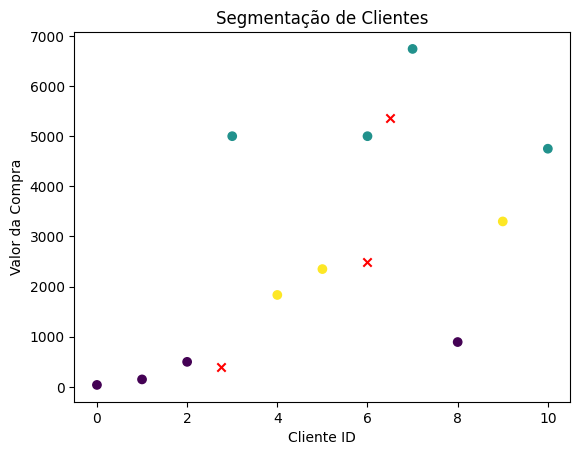

In [19]:
# Plotando um gráfico de dispersão dos clientes com cores diferentes para cada grupo
plt.scatter(dados_compras[:, 0], dados_compras[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red')
plt.xlabel('Cliente ID')
plt.ylabel('Valor da Compra')
plt.title('Segmentação de Clientes')
plt.show()

In [23]:
from sklearn.metrics import silhouette_score


In [24]:
silhouette_score(dados_compras, kmeans.predict(dados_compras))

0.6402592747403472

In [26]:
def avaliacao(dados_compras):
    inercia = []
    silhueta = []

    for k in range(2,5):
        kmeans = KMeans(n_clusters=k, random_state=45, n_init='auto')
        kmeans.fit(dados_compras)
        inercia.append(kmeans.inertia_)
        silhueta.append(f'k={k} - '+ str(silhouette_score(dados_compras, kmeans.predict(dados_compras))))
        
    return silhueta, inercia

In [27]:
silhueta, inercia = avaliacao(dados_compras)
silhueta

['k=2 - 0.6474028807916177',
 'k=3 - 0.6402592747403472',
 'k=4 - 0.6304805600706671']

In [20]:
# analisando a metrica inercia
def plot_cotovelo(inercia):
    plt.figure(figsize=(8,4))
    plt.plot(range(2,5),inercia,'bo-')
    plt.xlabel('Número de clusters')
    plt.ylabel('Inércia')
    plt.title('Método do Cotovelo para Determinação de k')
    plt.show()

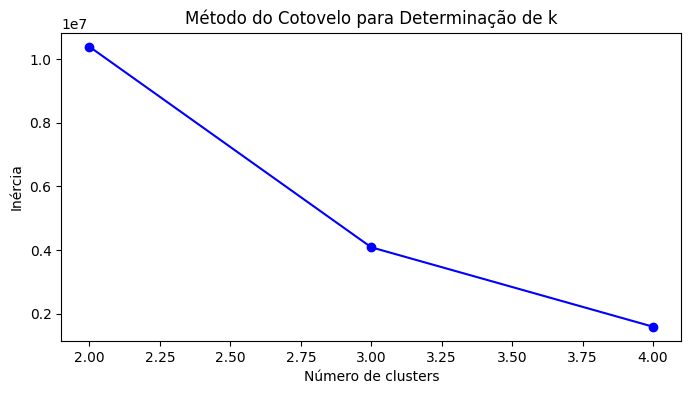

In [28]:
plot_cotovelo(inercia)